# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [2]:
x = pd.read_csv('explicativa.csv')
x

,possui_celular,possui_fone_comercial,possui_fone,possui_email,sexo_F,sexo_M,posse_de_veiculo_N,posse_de_veiculo_Y,posse_de_imovel_N,posse_de_imovel_Y,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,1,0,0,0,0,1,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1,1,0,1,1,1,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,1,0,1,1,1,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,0
3,1,1,1,1,0,1,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,1,1,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,1,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
16646,1,1,1,0,1,0,1,0,0,1,...,1,0,0,0,0,1,0,0,0,0
16647,1,1,0,0,0,1,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
16648,1,1,0,0,0,1,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0


In [3]:
y = pd.read_csv('target.csv')
y

,mau
0,0
1,0
2,0
3,0
4,0
...,...
16645,1
16646,1
16647,1
16648,1


In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=100,)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [5]:
tree = DecisionTreeClassifier(random_state=100)
tree = tree.fit(x_train,y_train)
y_chapeu_teste = tree.predict(x_test)
y_chapeu_teste

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

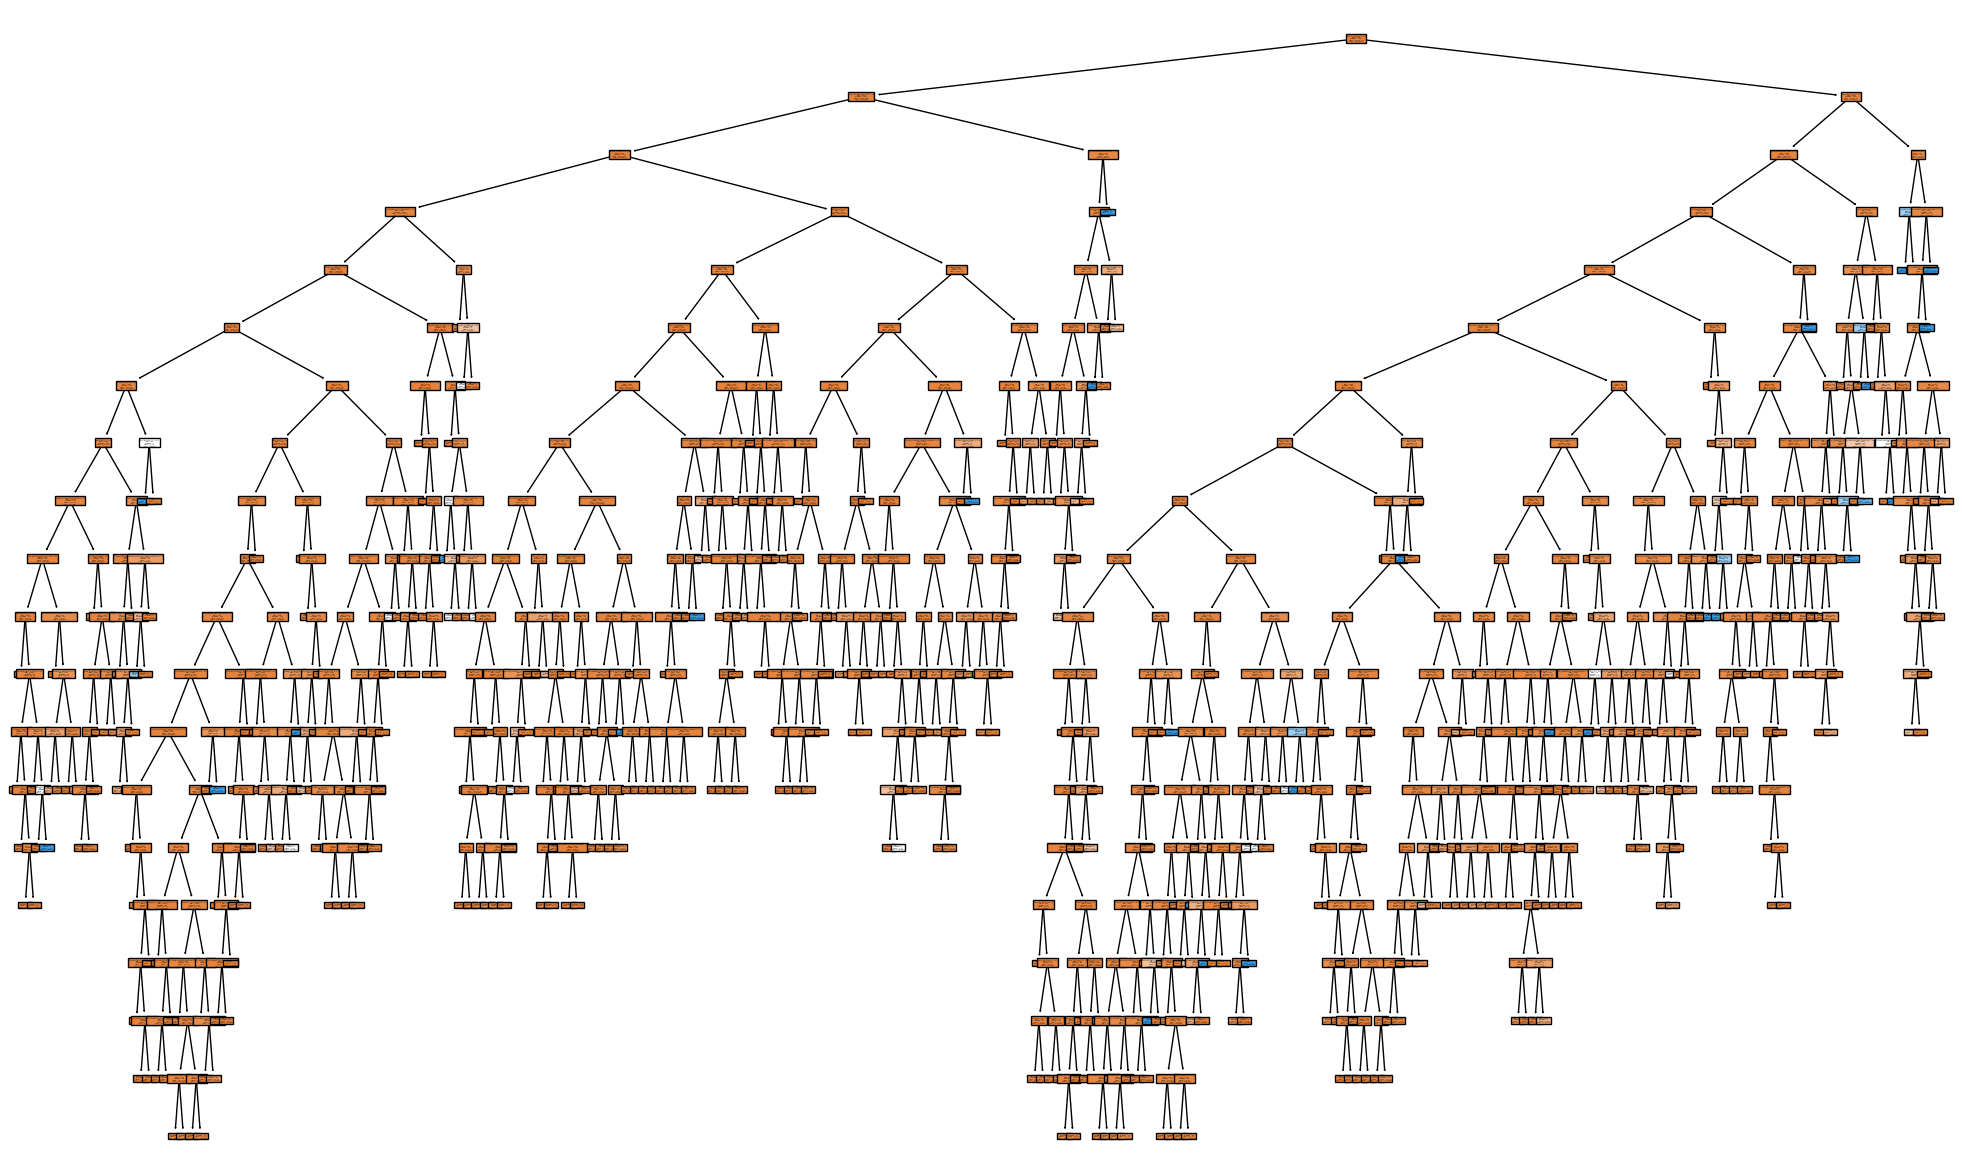

In [6]:
plt.figure(figsize=(25,15))
plot_tree(tree,filled=True,class_names=['Aprovados','Reprovados'],feature_names=list(x.columns));

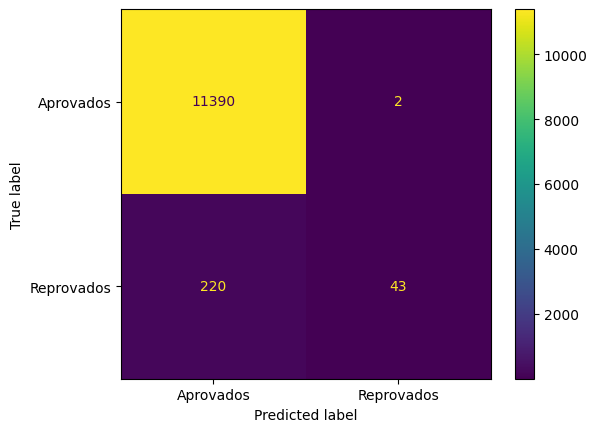

In [7]:
predict_train = tree.predict(x_train)
cm = confusion_matrix(y_train,predict_train,labels=tree.classes_)
MatrizDe_Confusao_train = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Aprovados','Reprovados'])
MatrizDe_Confusao_train.plot();

In [8]:
acuracia = accuracy_score(y_train,predict_train)*100
print(f'A acuracia para a base de treino foi: {acuracia}!')

A acuracia para a base de treino foi: 98.09523809523809!


In [9]:
# Só para eu relembrar que posso ver a acuracia de outra forma!
acc = (11390 + 43) / (11390 + 2 + 220 + 43) * 100
acc

98.09523809523809

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

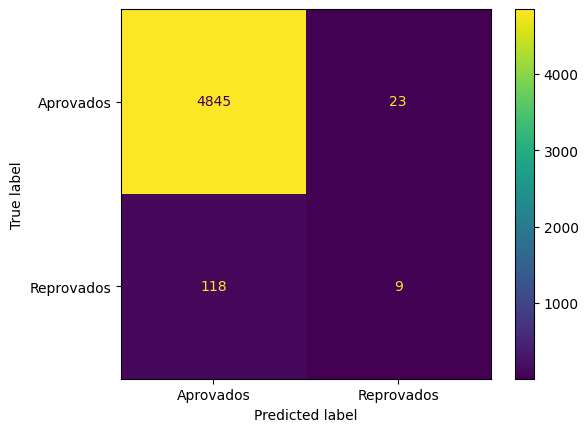

In [10]:
predict_test = tree.predict(x_test)
cmt = confusion_matrix(y_test,predict_test,labels=tree.classes_)
MatrizDeConfusao_test = ConfusionMatrixDisplay(confusion_matrix=cmt,display_labels=['Aprovados','Reprovados'])
MatrizDeConfusao_test.plot();

In [11]:
print(accuracy_score(y_test,predict_test))
predict_train = tree.predict(x_train)
print(accuracy_score(y_train,predict_train))

0.9717717717717718
0.9809523809523809


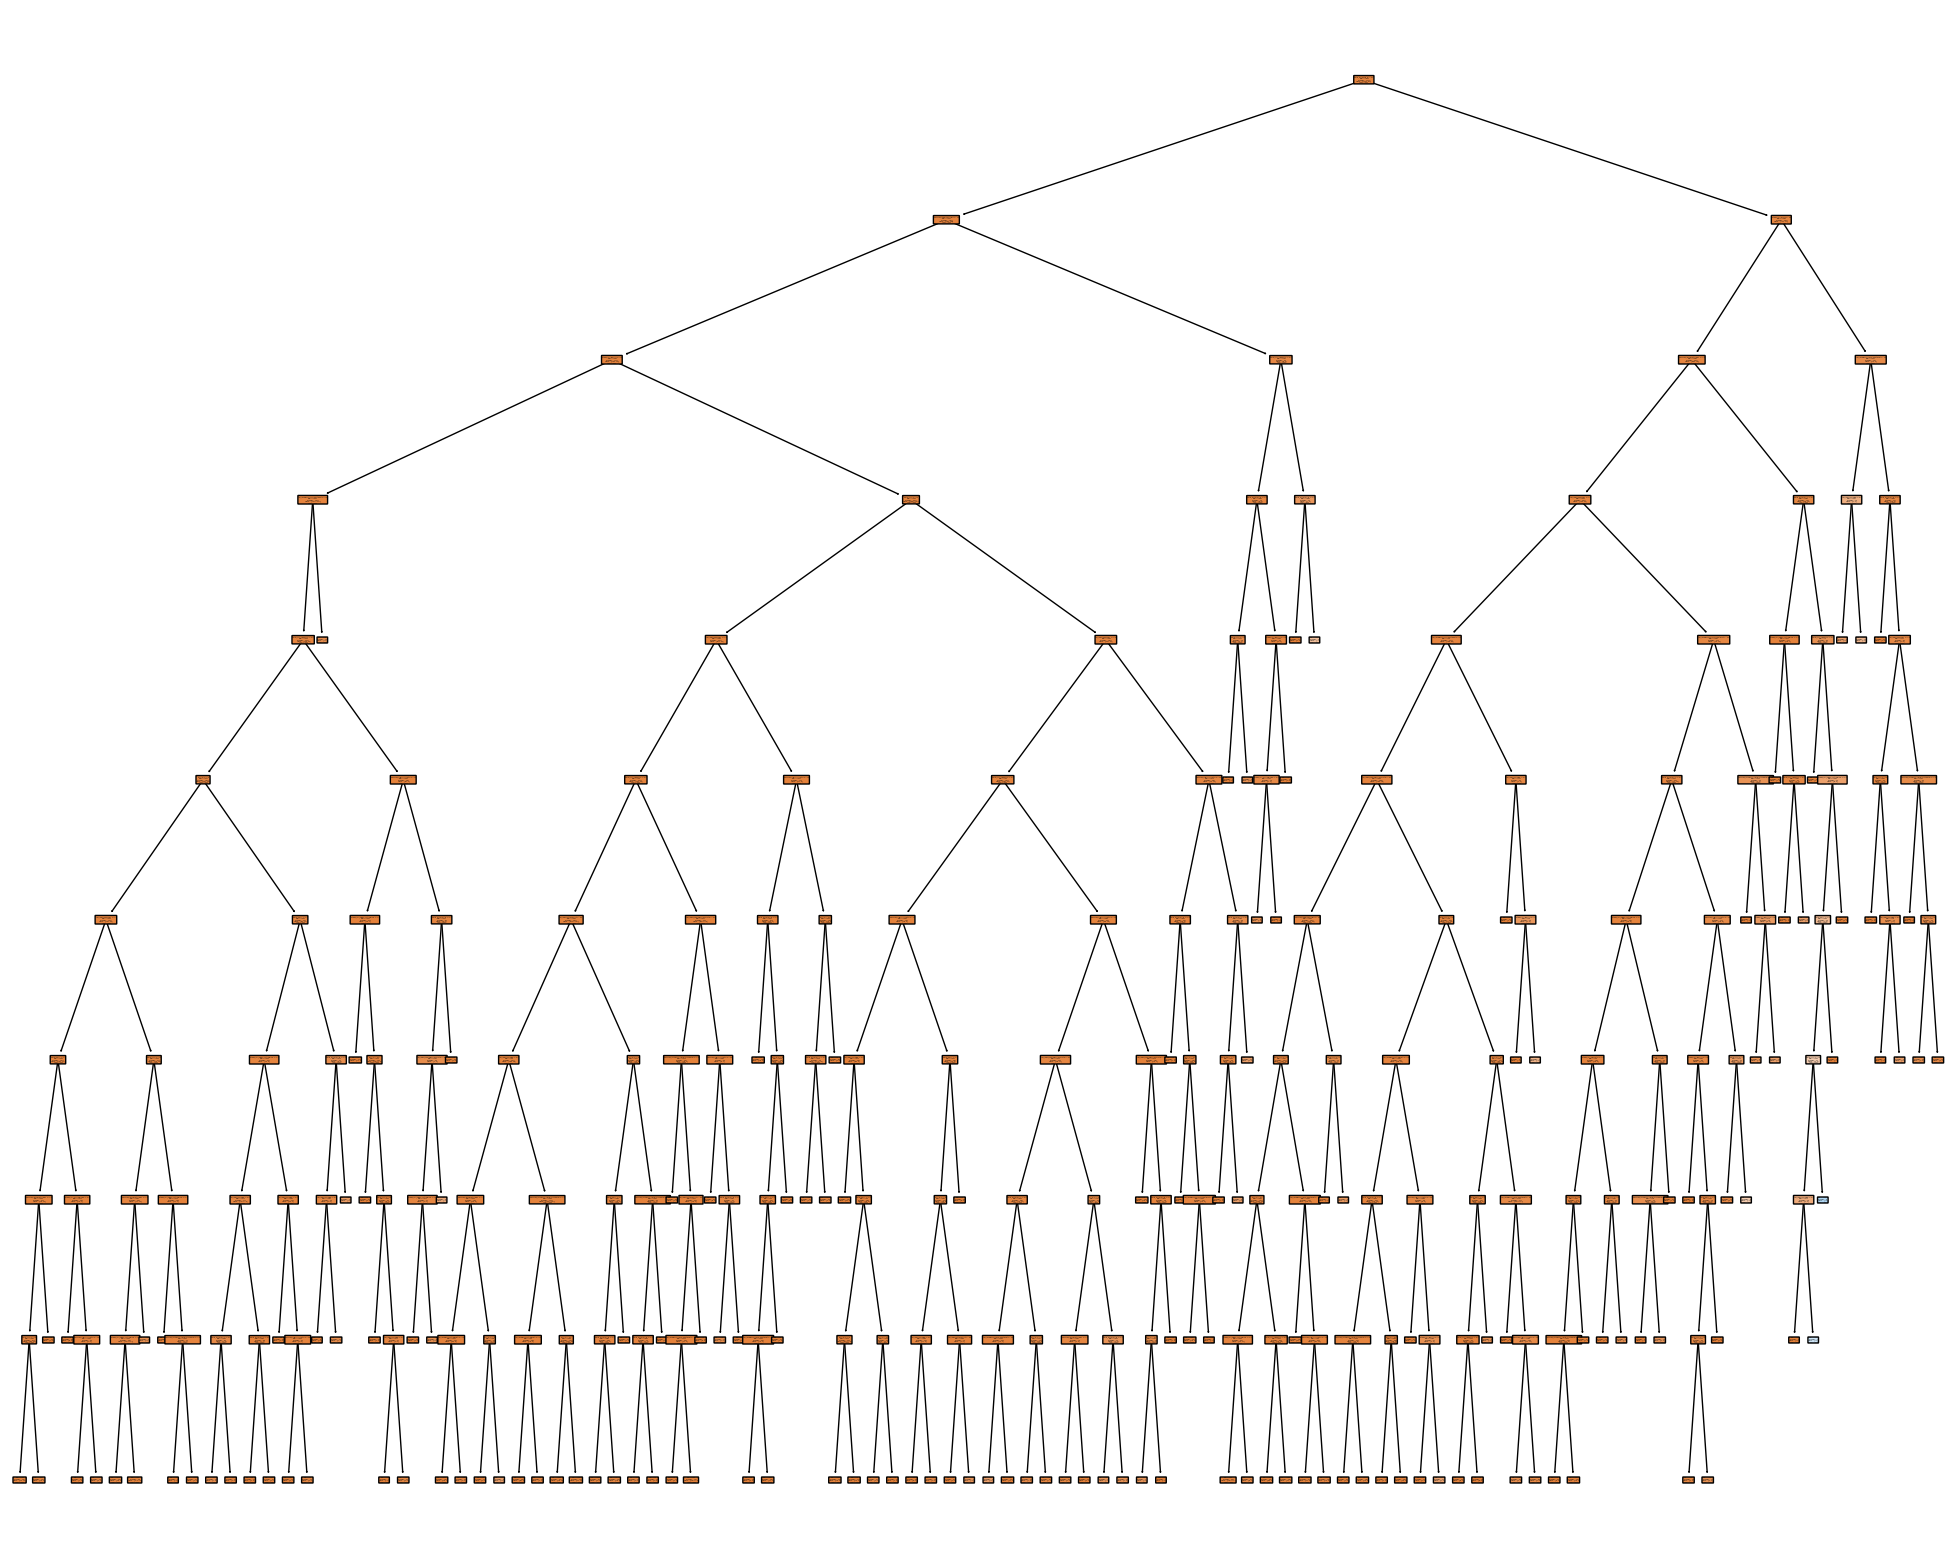

In [12]:
plt.figure(figsize=(25,20))
tree_poda = DecisionTreeClassifier(max_depth=10,min_samples_leaf=5,random_state=123)
tree_poda = tree_poda.fit(x_train,y_train)
plot_tree(tree_poda,filled=True,rounded=True,class_names=['mau','mau'],feature_names=list(x_train.columns));

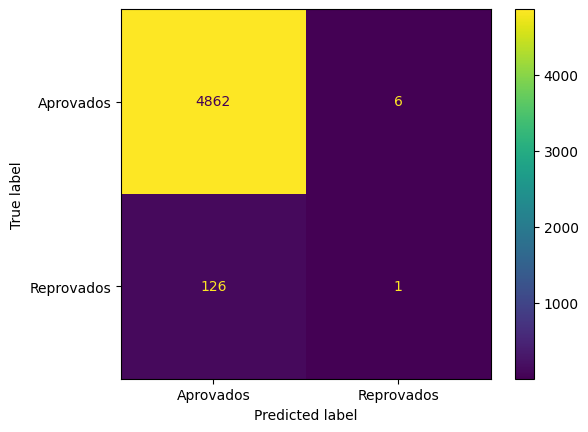

In [13]:
predict_test = tree_poda.predict(x_test)
accuracy_score_poda = accuracy_score(y_test,predict_test)
cmt = confusion_matrix(y_test,predict_test,labels=tree_poda.classes_)
MatrizDeConfusao_test = ConfusionMatrixDisplay(confusion_matrix=cmt,display_labels=['Aprovados','Reprovados'])
MatrizDeConfusao_test.plot();

In [14]:
accuracy_score_poda

0.9735735735735735

In [15]:
z = y
z['mau'] = 0
z


,mau
0,0
1,0
2,0
3,0
4,0
...,...
16645,0
16646,0
16647,0
16648,0


In [16]:
x_train,x_test,z_train,z_test = train_test_split(x,z,train_size=0.7,random_state=100,)

In [17]:
accuracy_100 = DecisionTreeClassifier(random_state=100)
accuracy_100 = accuracy_100.fit(x_train,z_train)

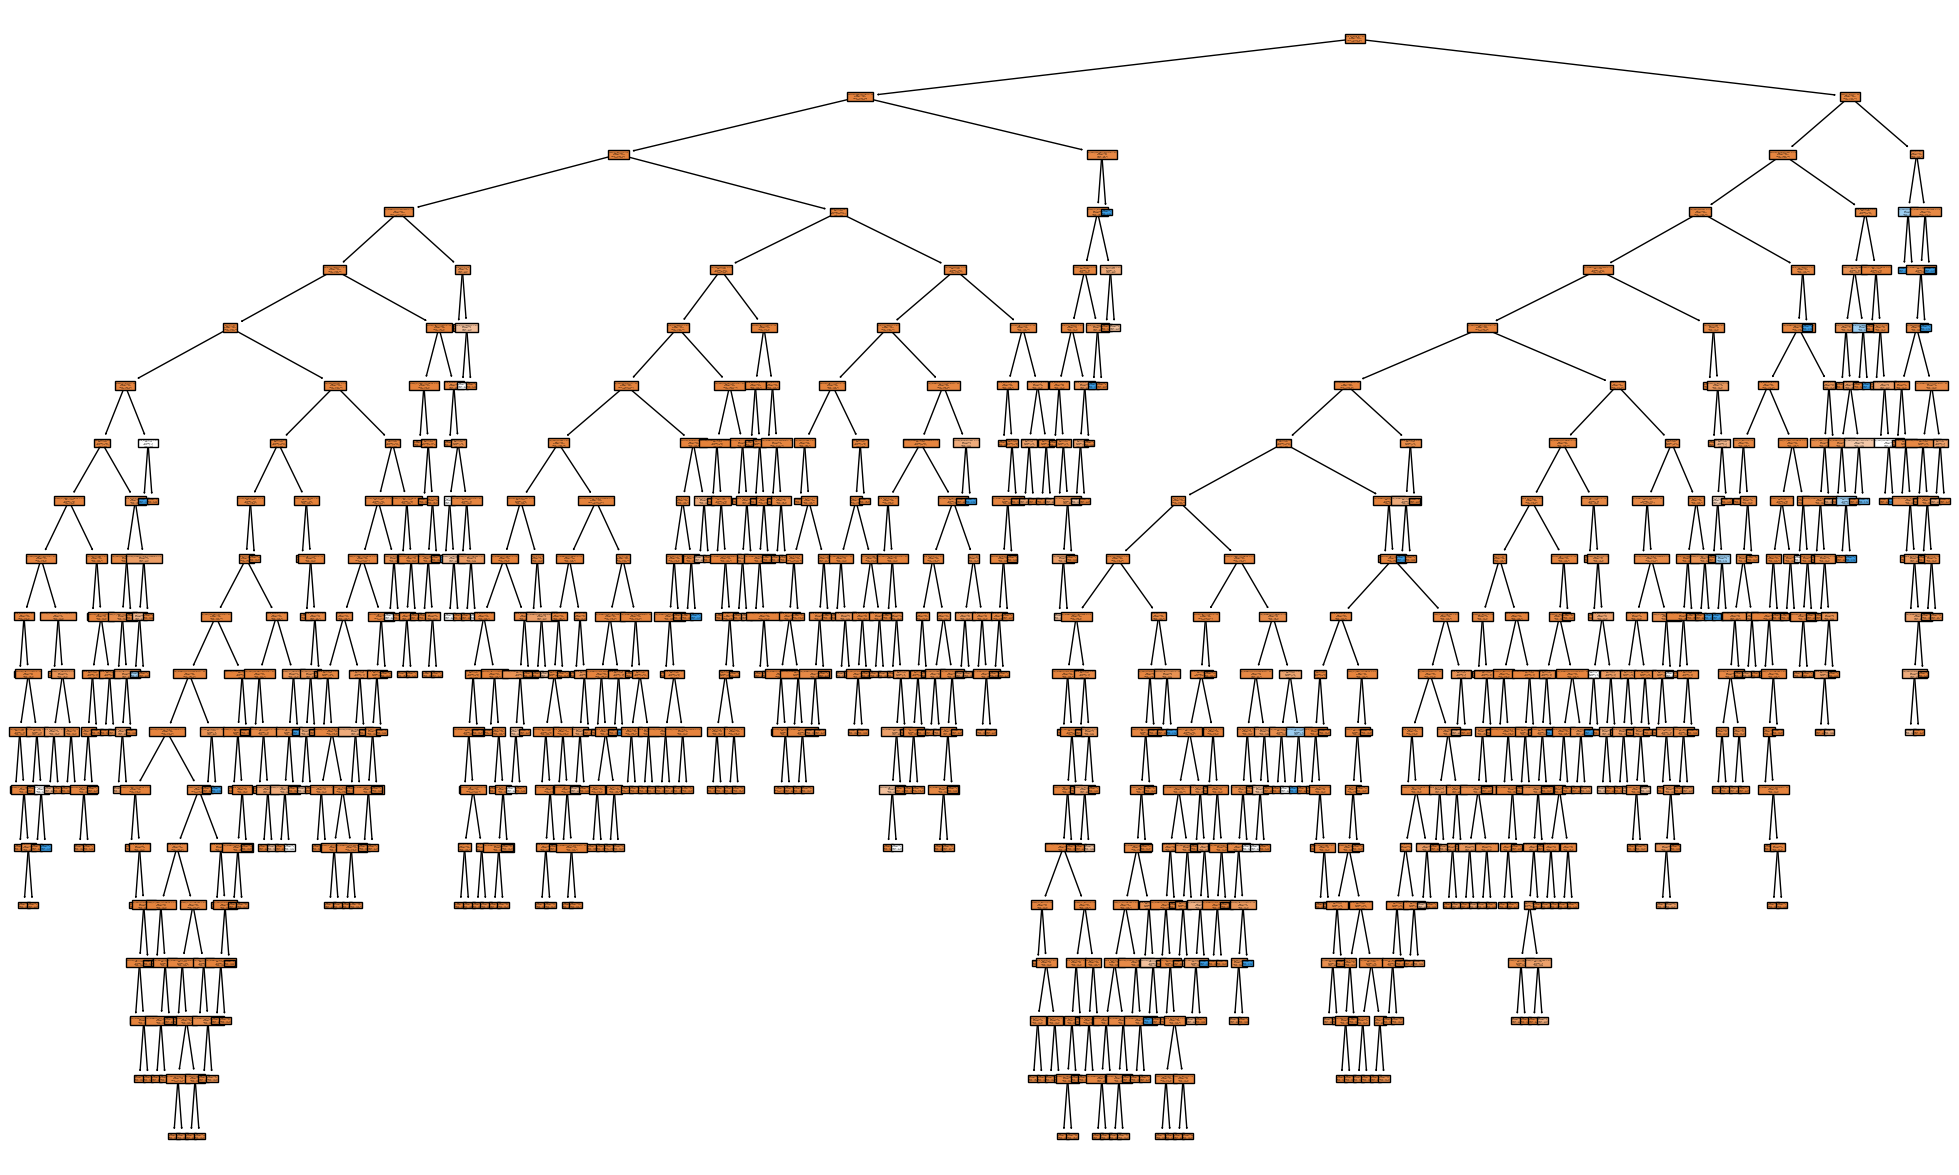

In [18]:
plt.figure(figsize=(25,15))
plot_tree(tree,filled=True,class_names=['mau','bom'],feature_names=list(x_train.columns));

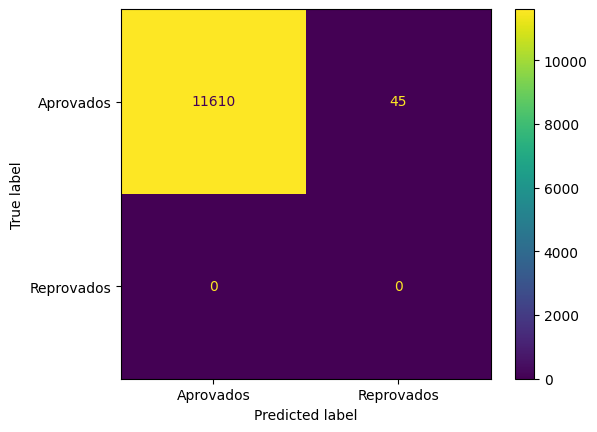

In [19]:
predict_train_100 = tree.predict(x_train)
cm = confusion_matrix(z_train,predict_train_100,labels=tree.classes_)
MatrizDe_Confusao_train = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Aprovados','Reprovados'])
MatrizDe_Confusao_train.plot();

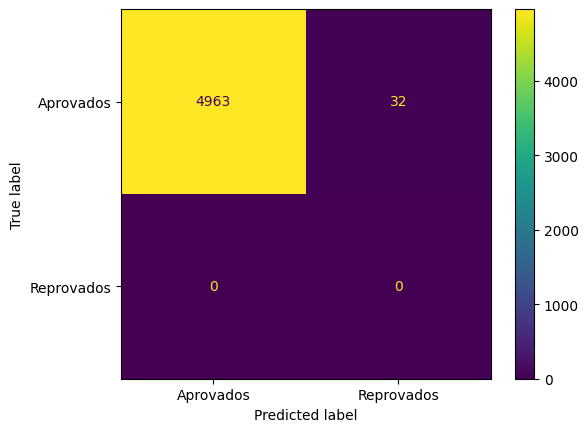

In [20]:
predict_test_100 = tree.predict(x_test)
cm = confusion_matrix(z_test,predict_test_100,labels=tree.classes_)
MatrizDe_Confusao_train = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Aprovados','Reprovados'])
MatrizDe_Confusao_train.plot();

In [21]:
print(accuracy_score(z_test,predict_test_100))
print(accuracy_score(z_train,predict_train_100))

0.9935935935935936
0.9961389961389961
